In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)


Mounted at /content/drive/


In [ ]:

"""
CMSC733 Spring 2019: Classical and Deep Learning Approaches for
Geometric Computer Vision
Homework 0: Alohomora: Phase 1 Starter Code


Author(s):
Nitin J. Sanket (nitin@terpmail.umd.edu)
PhD Candidate in Computer Science,
University of Maryland, College Park

Chahat Deep Singh (chahat@terpmail.umd.edu)
PhD Student in Computer Science,
University of Maryland, College Park
"""

# Code starts here:

import operator
import numpy as np
import cv2
import skimage.transform
from sklearn.cluster import KMeans
from scipy.signal import convolve2d
from scipy import ndimage
import matplotlib.pyplot as plt
import math

# Create a Gaussian kernel
def create_gaussian(kern_size, varx, vary) :
	# kern_size = 45
	# var = 3
	mean = (kern_size-1)/2

	kernel = np.zeros((kern_size, kern_size))

	for i in range(kern_size) :
		gauss_x = np.exp(-(np.square(i - mean)) / (2 * np.square(varx)))
		for j in range(kern_size):
				gauss_y = np.exp(-(np.square(j - mean)) / (2 * np.square(vary)))
				norm = 2* np.pi * varx* vary
				kernel[i,j] = gauss_x * gauss_y / norm

	return kernel


# Convolve with Sobel operator
def conv_sob(gaussian) :
	sobel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
	return (np.array(convolve2d(gaussian, sobel)))

def conv_laplacian(gaussian):#,kern_size, varx, vary) :
	laplacian_x = np.array([[0,1,0],[1,-4,1],[0,1,0]])
	lap1 = (np.array(convolve2d(gaussian, laplacian_x)))
	laplacian_y = np.array([[1,1,1],[1,-8,1],[1,1,1]])
	lap2 = (np.array(convolve2d(gaussian, laplacian_y)))
	return lap1+lap2


# Rotate the gaussian
def rotate(gaussian, orient):
	# angle_1 = 360/orient
	angle_1 = -30
	gauss_fb = []
	for i in range(orient) :
		gauss_fb.append(ndimage.rotate(gaussian, angle= i*angle_1, reshape = False))
	return np.array(gauss_fb)


def create_gabor(kern_size, sigma, lam, theta, psi, gamma):
	mean = kern_size/2
	gabor = np.zeros((kern_size, kern_size))
	for i in range(kern_size):
		for j in range(kern_size):
			x_p = (i-mean)*np.cos(theta) + (j-mean)*np.sin(theta)
			y_p = (j-mean)*np.cos(theta) - (i-mean)*np.sin(theta)
			gabor[i,j] = np.exp(-(x_p**2 + (gamma**2)*(y_p**2))/(2*sigma**2))*np.cos((2*np.pi*x_p)/lam+ psi)
	return gabor


def create_texton(filters):
	texton = []
	for i in range(10) :

		image_curr = cv2.imread("/content/drive/MyDrive/Phase1/BSDS500/Images/"+f"{i+1}.jpg")
		image_curr = cv2.cvtColor(image_curr, cv2.COLOR_BGR2GRAY)
		print(image_curr.shape)
		texton_curr = np.zeros(( len(filters),image_curr.shape[0], image_curr.shape[1]))
		for j in range(len(filters)) :
			# out = cv2.filter2D(image_curr, -1, fil)
			# print(type(fil))
			out = convolve2d(image_curr,np.array(filters[j]), mode = 'same')
			# print(out.shape)
			texton_curr[j,:,:] = out

		# kmeans argument shape = (nsamples, nfeatures)
		# samples = convoluted pixels, features = filters

		texton_curr = texton_curr.transpose(1, 2, 0).reshape(-1, len(filters))

		kmeans = KMeans(n_clusters=100,n_init=4)
		kmeans.fit(texton_curr)
		labels = kmeans.labels_  # Labels each pixel
		# print(labels.shape)
		print(labels.shape)
		texton_temp = np.reshape(labels,(image_curr.shape))
		texton.append(texton_temp)
	return texton


def create_brightness_map():
	maps = []
	for i in range(10) :

		image_curr = cv2.imread("/content/drive/MyDrive/Phase1/BSDS500/Images/"+f"{i+1}.jpg")
		image_curr = cv2.cvtColor(image_curr, cv2.COLOR_BGR2GRAY)
		print(image_curr.shape)
		image = image_curr.reshape((image_curr.shape[0]*image_curr.shape[1]),1)
		# map_curr = np.zeros((image_curr.shape))

		# map_curr = texton_curr.transpose(1, 2, 0).reshape(-1, len(filters))

		kmeans = KMeans(n_clusters=16, n_init = 10)
		kmeans.fit(image)
		labels = kmeans.labels_  # Labels each pixel
		# print(labels.shape)
		print(labels.shape)

	# Use np.reshape a labels may/ may not be numpy arrays
		map_temp = np.reshape(labels,(image_curr.shape))
		maps.append(map_temp)
	return maps


def create_color_maps():
	redmaps = []
	greenmaps = []
	bluemaps = []
	for i in range(10) :

		image_curr = cv2.imread("/content/drive/MyDrive/Phase1/BSDS500/Images/"+f"{i+1}.jpg")
		# image_curr = cv2.cvtColor(image_curr, cv2.COLOR_BGR2GRAY)
		print(image_curr[:,:,0].shape)
		red_channel = image_curr[:,:,0].reshape((image_curr.shape[0]*image_curr.shape[1], 1))
		blue_channel = image_curr[:,:,2].reshape((image_curr.shape[0]*image_curr.shape[1], 1))
		green_channel = image_curr[:,:,1].reshape((image_curr.shape[0]*image_curr.shape[1], 1))


		kmeans = KMeans(n_clusters=16, n_init = 10)
		kmeans.fit(red_channel)
		redlabels = kmeans.labels_

	# Use np.reshape a labels may/ may not be numpy arrays
		red_temp = np.reshape(redlabels,(image_curr.shape[0],image_curr.shape[1]))
		redmaps.append(red_temp)


		kmeans.fit(green_channel)
		greenlabels = kmeans.labels_  # Labels each pixel


	# Use np.reshape a labels may/ may not be numpy arrays
		green_temp = np.reshape(greenlabels,(image_curr.shape[0],image_curr.shape[1]))
		greenmaps.append(green_temp)

		kmeans.fit(blue_channel)
		bluelabels = kmeans.labels_  # Labels each pixel


	# Use np.reshape a labels may/ may not be numpy arrays
		blue_temp = np.reshape(bluelabels,(image_curr.shape[0],image_curr.shape[1]))
		bluemaps.append(blue_temp)


	return redmaps, greenmaps, bluemaps




def create_color_maps1():
	color_maps = []
	for i in range(10) :

		image_curr = cv2.imread("/content/drive/MyDrive/Phase1/BSDS500/Images/"+f"{i+1}.jpg")
		# image_curr = cv2.cvtColor(image_curr, cv2.COLOR_BGR2GRAY)
		# print(image_curr[:,:,0].shape)
		img = image_curr.reshape((image_curr.shape[0]*image_curr.shape[1]), 3)


		kmeans = KMeans(n_clusters=16, n_init = 10)
		kmeans.fit(img)
		labels = kmeans.labels_

	# Use np.reshape a labels may/ may not be numpy arrays
		img_temp = np.reshape(labels,(image_curr.shape[0],image_curr.shape[1]))
		print(img_temp.shape)
		color_maps.append(img_temp)

	return color_maps



def half_disk_mask(size,angle):
		radius = int((size-1)/2)
		halfdisk = np.ones([size,size])
		for i in range(radius):
				for j in range(size):
						dist = (i-radius)**2 + (j-radius)**2
						if (dist < radius**2):
								halfdisk[i,j] = 0
		halfdisk = skimage.transform.rotate(halfdisk,angle,cval=1)
		halfdisk = np.round(halfdisk)
		return halfdisk

def create_halfdisks():
		sizes = [7, 11, 21, 35]
		halfdisks = []
		orientations = 7
		orients= []
		for i in range(orientations) :
			orients.append(i*25)
		for size in sizes:
				for ang in orients:
						half_mask = half_disk_mask(size,ang)
						half_mask_next = ndimage.rotate(half_mask, angle = 180, reshape = False)
						# half_mask_rot = np.round(half_mask_rot)
						halfdisks.append(half_mask)
						halfdisks.append(half_mask_next)


		return halfdisks

def chi_square(img, bins, hdm ) :
	temp = np.zeros_like(img)
	dist = img*0
	for j in range(int(len(hdm)/2)) :

		for i in range(0,bins):
			temp[img == bins] = 1
			g = convolve2d(img, hdm[2*j], mode='same')
			h = convolve2d(img, hdm[2*j+1], mode= 'same')
			dist = dist+((g-h)**2/(g+h+0.00001))
		grad = np.dstack((img,dist))
	fin = np.mean(grad, axis=2)
	return fin




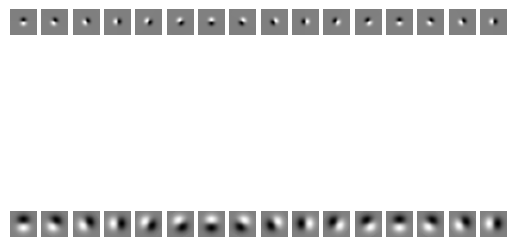

DoG completed
36
48


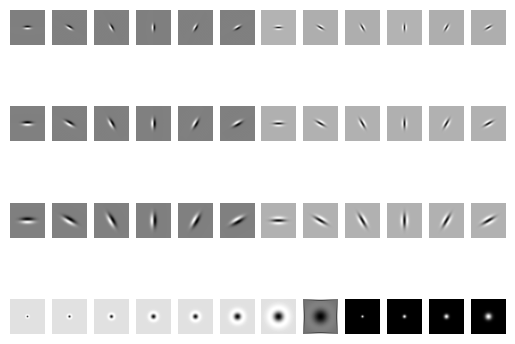

LM filters generated


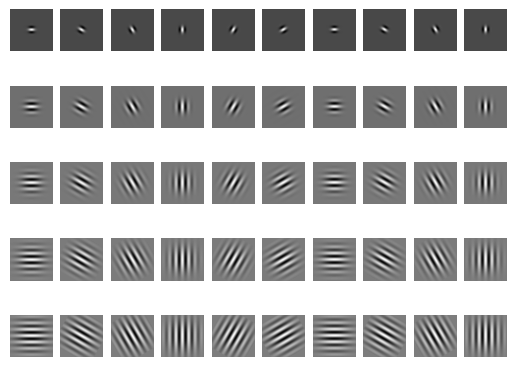

(321, 481)
(154401,)
(321, 481)
(154401,)
(321, 481)
(154401,)
(321, 481)
(154401,)
(321, 481)
(154401,)
(321, 481)
(154401,)
(321, 481)
(154401,)
(321, 481)
(154401,)
(321, 481)
(154401,)
(481, 321)
(154401,)


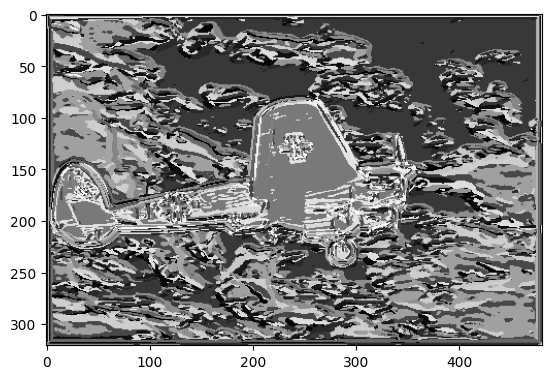

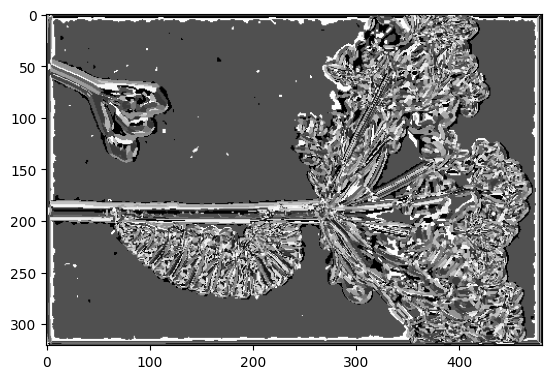

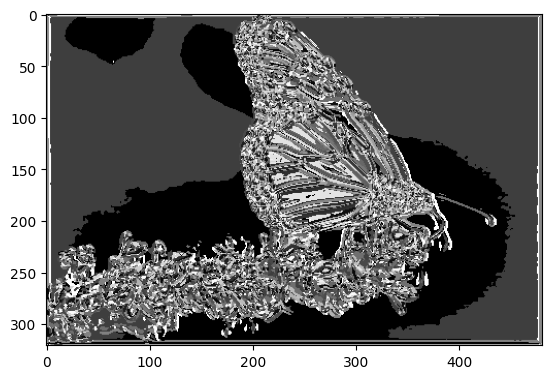

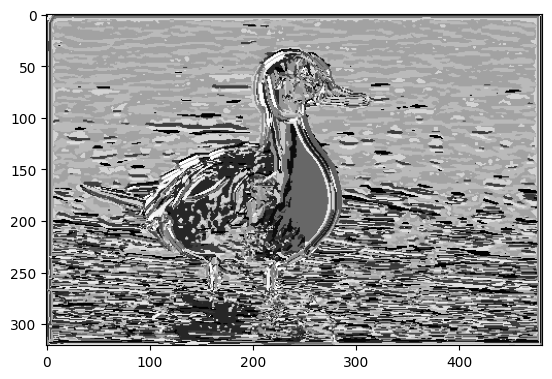

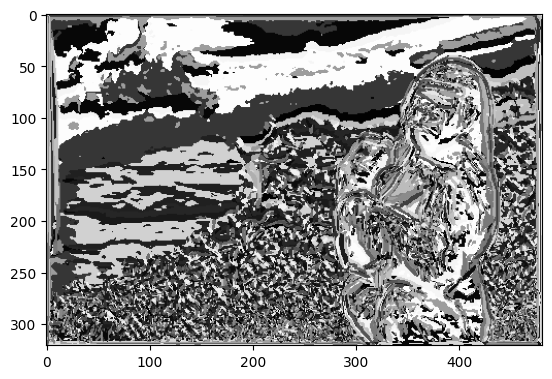

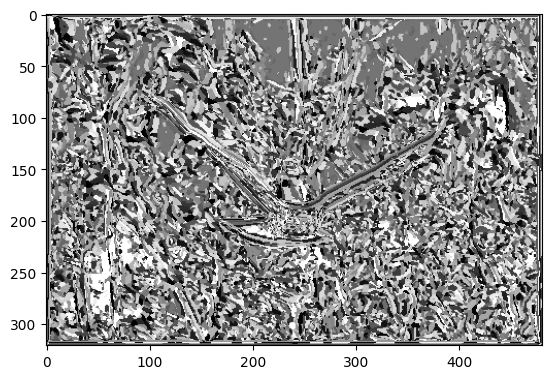

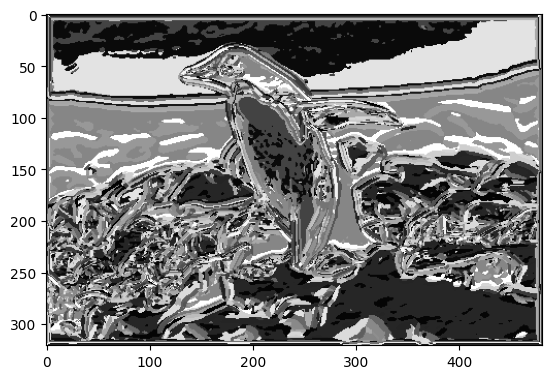

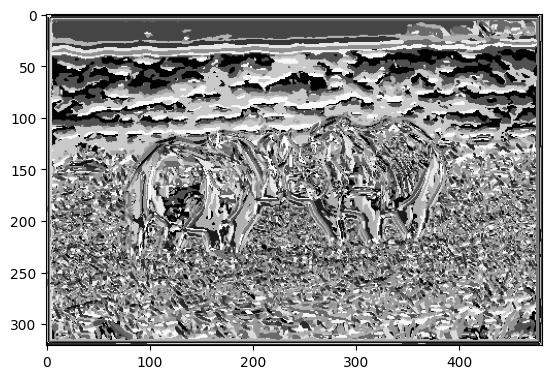

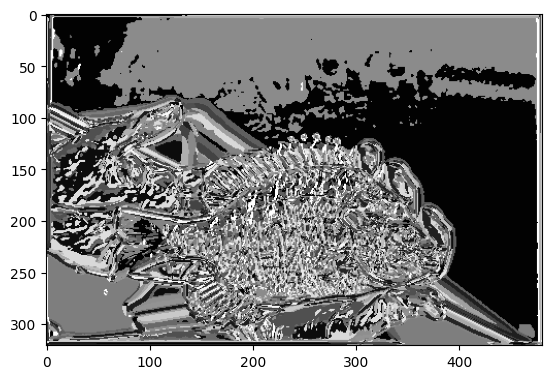

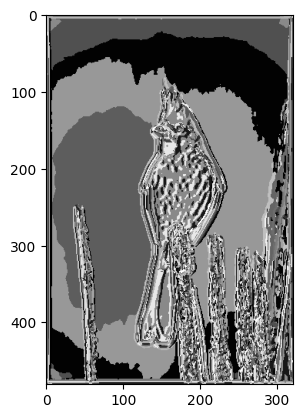

'\nCombine responses to get pb-lite output\nDisplay PbLite and save image as PbLite_ImageName.png\nuse command "cv2.imwrite(...)"\n'

In [ ]:


"""
Generate Difference of Gaussian Filter Bank: (DoG)
Display all the filters in this filter bank and save image as DoG.png,
use command "cv2.imwrite(...)"
"""


# DoG steps :
# create a gaussian kernel
# convolve with sobel operator
# rotate for no.of orientations

gaussian1 = create_gaussian(21, 1.5, 1.5)
gaussian2 = create_gaussian(21, 3.5, 3.5)
conv1 = conv_sob(gaussian1)
conv2 = conv_sob(gaussian2)

# print(conv1.shape)
orientations = 16
scales = 2
gauss_fb = rotate(conv1, orientations)
# print(gauss_kernel.shape)
gauss_fb = np.concatenate((gauss_fb,rotate(conv2, orientations)))

# plt.figure()
# plt.imshow(conv2, cmap='gray')
_, ax = plt.subplots(scales, orientations)

for j in range(scales) :
	for i in range(orientations):
		if j==0 :
			ax[j,i].imshow(gauss_fb[i], cmap = "gray")
			ax[j,i].set_axis_off()
		else :
			ax[j,i].imshow(gauss_fb[i+orientations], cmap = "gray")
			ax[j,i].set_axis_off()
		# print(len(gauss_kernel))


temp_img_file = '/home/rashmikapu/Desktop/cmsc733/rashmik_hw0/Phase1/Code/DoG.png'
# plt.savefig(temp_img_file)


# plot_image = cv2.imread(temp_img_file)
# output_file = '/home/rashmikapu/Desktop/cmsc733/rashmik_hw0/Phase1/Code/DoG2.png'
# cv2.imwrite(output_file, plot_image)

plt.show()

print("DoG completed")
#########################################################################################################3
"""
Generate Leung-Malik Filter Bank: (LM)
Display all the filters in this filter bank and save image as LM.png,
use command "cv2.imwrite(...)"
"""

# Steps
# Generate Gaussian filters for each scale, (Standard deviations)
# no.of filters = 4
# Take first and second order derivatives for Gaussian = 6 orientations
# no.of filters = 6*3*2 + 4 =  40
# Take laplacian of gaussian filters - convolute Gaussian filters with laplacian operator
# No.of filters = 40 + 4 + 4 = 48 (4 across x and 4 across y)

scales_list = [1, np.sqrt(2), 2, 2*np.sqrt(2)]


orientations = 6
lm_list=[]
for i in range(3) :
	gauss = create_gaussian(45,scales_list[i], 3*scales_list[i] )

	first_der = conv_sob(gauss)

	second_der = conv_sob(first_der)
	h = rotate(first_der, orientations)

	for arr in h :
		lm_list.append(arr.tolist())

	# print(len(lm_list))
	k = rotate(second_der, orientations)

	for arr in k :
		lm_list.append(arr.tolist())
print(len(lm_list))


for s in scales_list:
	gauss = create_gaussian(45,s,s)

	laplacian_sig = conv_laplacian(gauss)
	lm_list.append(laplacian_sig.tolist())


for s in scales_list:
	gauss = create_gaussian(45, 3*s, 3*s)
	laplacian_3sig = conv_laplacian(gauss)
	lm_list.append(laplacian_3sig)

for s in scales_list :
	gauss = create_gaussian(45, s, s)
	lm_list.append(gauss)

print(len(lm_list))
_, ax = plt.subplots(4, 12 )

for j in range(4) :
	for i in range(12):

		ax[j,i].imshow(lm_list[12*j + i], cmap = "gray")
		ax[j,i].set_axis_off()

# plt.savefig("/home/rashmikapu/Desktop/cmsc733/rashmik_hw0/Phase1/Code/LM.png")

plt.show()
print("LM filters generated")
##############################################################################

"""
Generate Gabor Filter Bank: (Gabor)
Display all the filters in this filter bank and save image as Gabor.png,
use command "cv2.imwrite(...)"
"""

# Steps :
# Define kernel size, sigma, lambda, gamma, theta, psi
# Create Gabor filter using the formula
# Rotate those filters (10 orientations)
# Now change standard deviation values and create different gabor filters
i = 10
gabor_fb = []
while(i<=50):
	gabor_curr = create_gabor(201,i,30,0,0,1)    #kernel, sigma, lambda, theta, psi, gamma)
	h = rotate(gabor_curr, 10)
	for k in h :
		gabor_fb.append(k.tolist())
	i+=10
# print()



_, ax = plt.subplots(5, 10 )

for j in range(5) :
	for i in range(10):

		ax[j,i].imshow(gabor_fb[10*j + i], cmap = "gray")
		ax[j,i].set_axis_off()

# plt.imshow(gabor_fb, cmap='gray')
# plt.savefig("/home/rashmikapu/Desktop/cmsc733/rashmik_hw0/Phase1/Code/Gabor.png")
plt.show()







#######################################################################
"""
Generate Half-disk masks
Display all the Half-disk masks and save image as HDMasks.png,
use command "cv2.imwrite(...)"
"""

# Steps :
# First take a radius and orientation
# Create a semi circle with horizontal diameter, then rotate it to the
# orientation desired - that's one mask, take 180 degree rotation to get other



#############################################################################



"""
Generate Texton Map
Filter image using oriented gaussian filter bank
"""

# Steps :
# Take the filters and convolute on the images.
# Filters have different sizes since convolve2d in scipy adds padding to
# account for all filters. Use cv2.filter2D instead. Give depth = -1
# to get same size after convolution or use convolve2D with mode =same
# Cluster each of these (using K-means), extract labels in the same size
# as the images

filters_texton = gauss_fb.tolist() + lm_list #+ gabor_fb[40:]
# print("filter size")
# print(len(filters_texton[40]))
texton = create_texton(filters_texton)
# _, ax = plt.subplots(1, len(texton) )
i = 0

for tex in texton :
	# cv2.imshow("im", tex)
	# cv2.waitKey(0)
	# cv2.destroyAllWindows()
	plt.imshow(tex, cmap='gray')
	# plt.set_axis_off()
	i+=1
	plt.show()
################################################################################

"""
Generate texture ID's using K-means clustering
Display texton map and save image as TextonMap_ImageName.png,
use command "cv2.imwrite('...)"
"""


"""
Generate Texton Gradient (Tg)
Perform Chi-square calculation on Texton Map
Display Tg and save image as Tg_ImageName.png,
use command "cv2.imwrite(...)"
"""


"""
Generate Brightness Map
Perform brightness binning
"""


"""
Generate Brightness Gradient (Bg)
Perform Chi-square calculation on Brightness Map
Display Bg and save image as Bg_ImageName.png,
use command "cv2.imwrite(...)"
"""


"""
Generate Color Map
Perform color binning or clustering
"""


"""
Generate Color Gradient (Cg)
Perform Chi-square calculation on Color Map
Display Cg and save image as Cg_ImageName.png,
use command "cv2.imwrite(...)"
"""


"""
Read Sobel Baseline
use command "cv2.imread(...)"
"""


"""
Read Canny Baseline
use command "cv2.imread(...)"
"""


"""
Combine responses to get pb-lite output
Display PbLite and save image as PbLite_ImageName.png
use command "cv2.imwrite(...)"
"""


(321, 481)
(154401,)
(321, 481)
(154401,)
(321, 481)
(154401,)
(321, 481)
(154401,)
(321, 481)
(154401,)
(321, 481)
(154401,)
(321, 481)
(154401,)
(321, 481)
(154401,)
(321, 481)
(154401,)
(481, 321)
(154401,)
(321, 481)


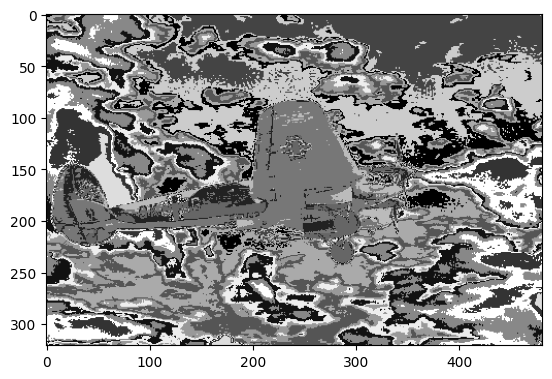

(321, 481)


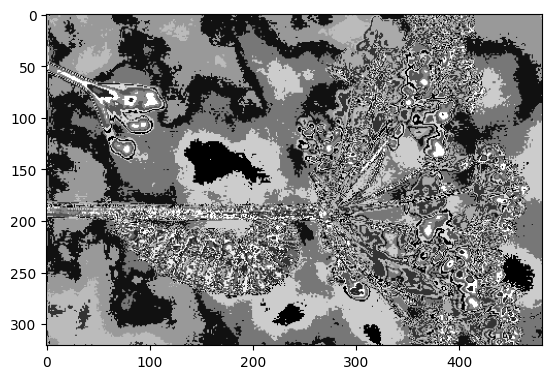

(321, 481)


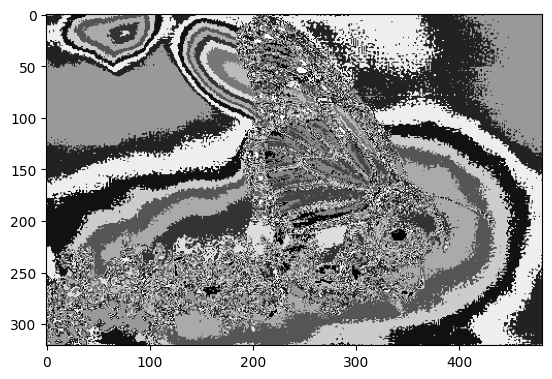

(321, 481)


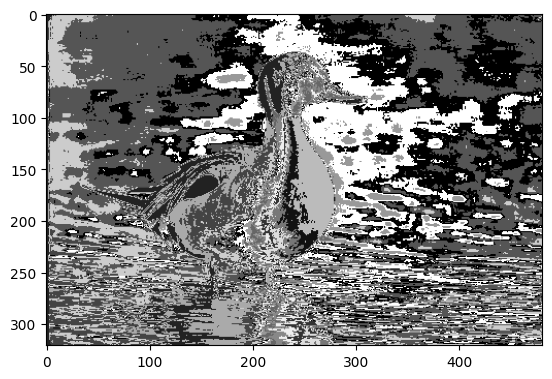

(321, 481)


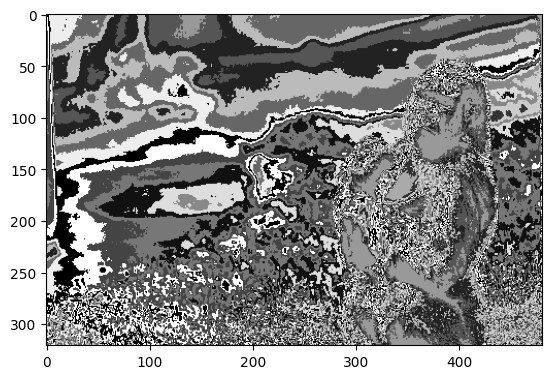

(321, 481)


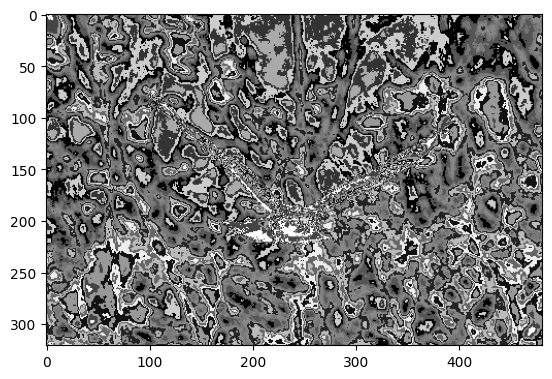

(321, 481)


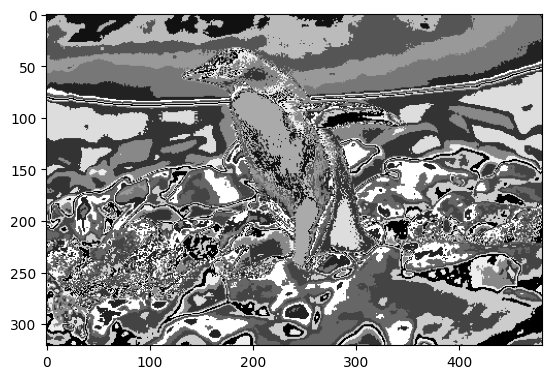

(321, 481)


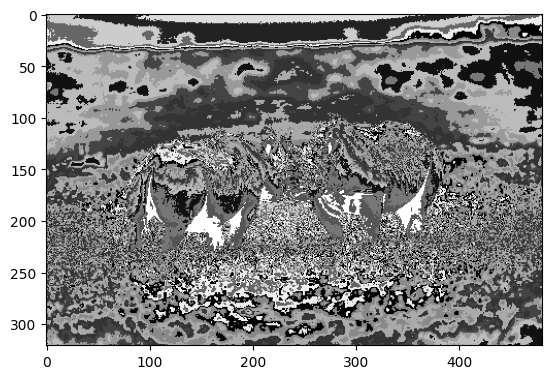

(321, 481)


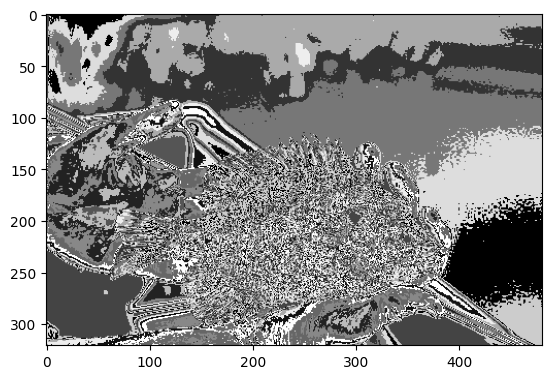

(481, 321)


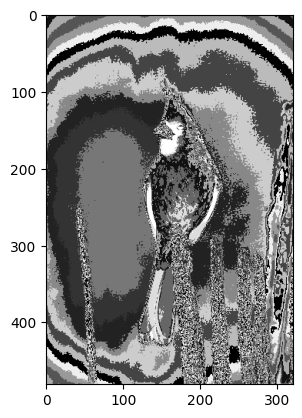

In [ ]:
brightness_maps = create_brightness_map()
	# _, ax = plt.subplots(1, len(texton) )
i = 0

for map in brightness_maps :
  print(map.shape)
  plt.imshow(map, cmap='gray')
		# plt.axis('off')
  i+=1
  plt.show()

(321, 481)
(321, 481)
(321, 481)
(321, 481)
(321, 481)
(321, 481)
(321, 481)
(321, 481)
(321, 481)
(481, 321)


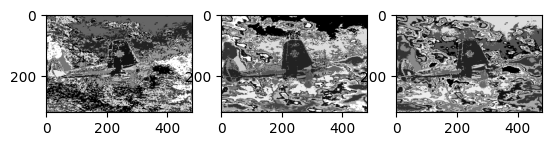

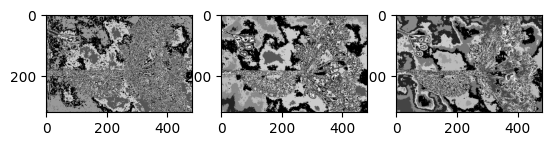

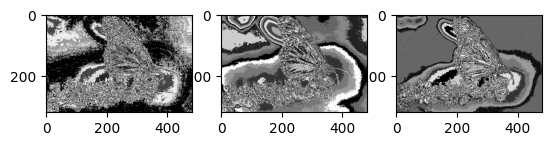

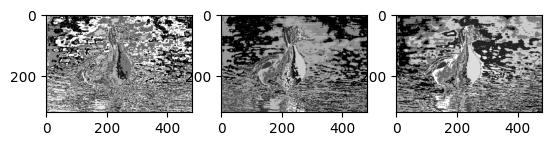

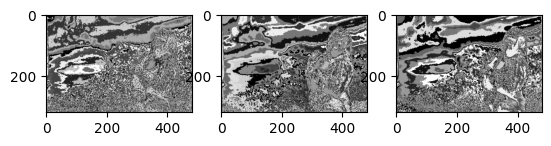

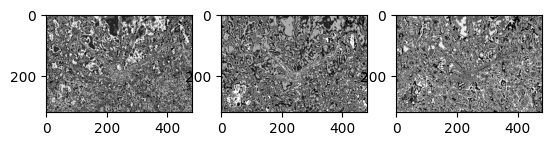

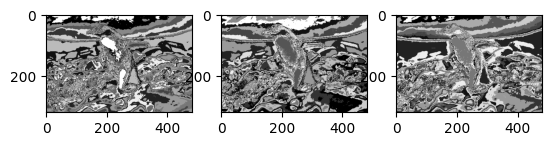

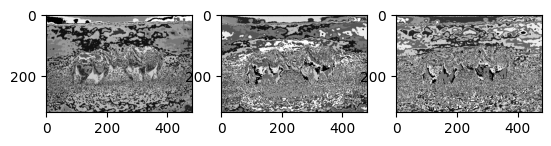

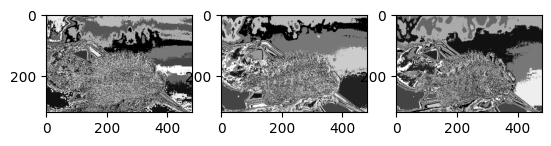

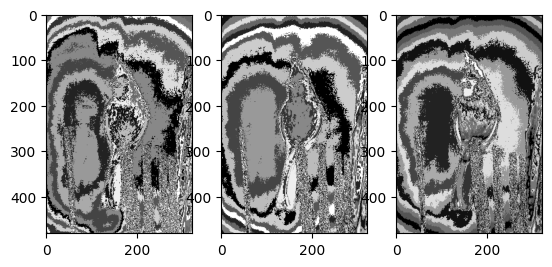

In [ ]:
red_maps, green_maps, blue_maps = create_color_maps()




for i in range(10) :
  _, ax = plt.subplots(1, 3)
  ax[0].imshow(red_maps[i], cmap='gray')
  ax[1].imshow(green_maps[i], cmap='gray')
  ax[2].imshow(blue_maps[i], cmap='gray')
	ax.set_axis_off()
  plt.show()

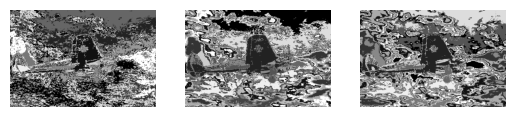

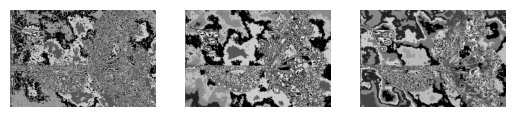

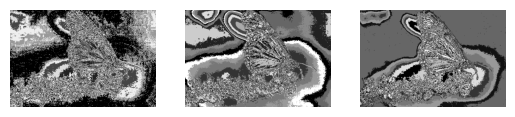

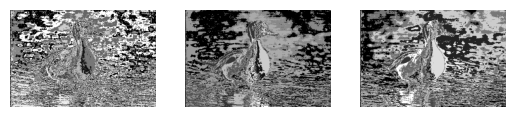

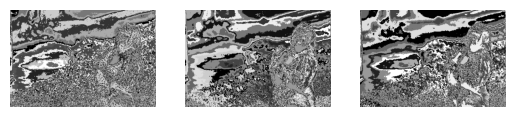

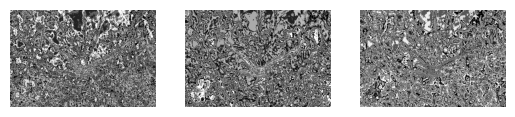

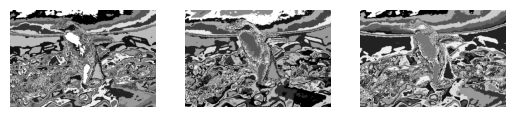

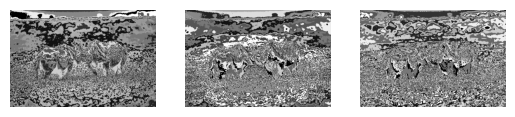

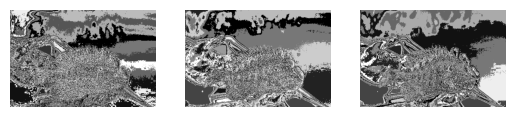

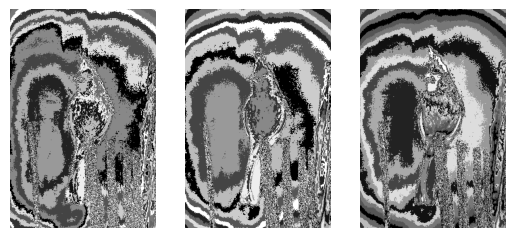

In [ ]:
for i in range(10) :
  _, ax = plt.subplots(1, 3)
  ax[0].imshow(red_maps[i], cmap='gray')
  ax[1].imshow(green_maps[i], cmap='gray')
  ax[2].imshow(blue_maps[i], cmap='gray')
  ax[0].set_axis_off()
  ax[1].set_axis_off()
  ax[2].set_axis_off()

  plt.show()

In [ ]:
color_maps = create_color_maps1()

(321, 481)
(321, 481)
(321, 481)
(321, 481)
(321, 481)
(321, 481)
(321, 481)
(321, 481)
(321, 481)
(481, 321)


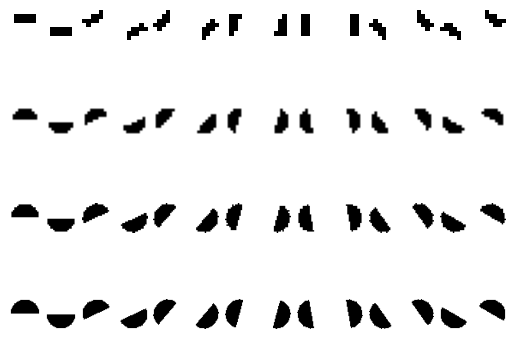

In [ ]:
halfdisks = create_halfdisks()
_, ax = plt.subplots(4, 14 )

for j in range(4) :
  for i in range(14):

    ax[j,i].imshow(halfdisks[14*j + i], cmap = "gray")
    ax[j,i].set_axis_off()

plt.savefig("/content/drive/MyDrive/Phase1/Code/halfdisks.png")
plt.show()

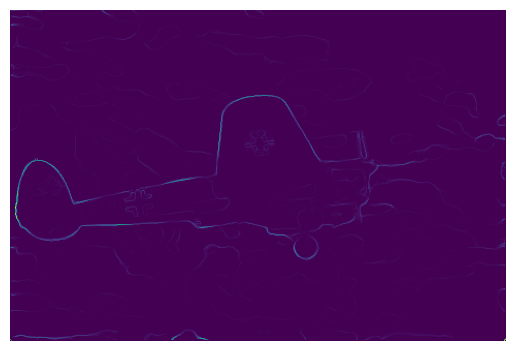

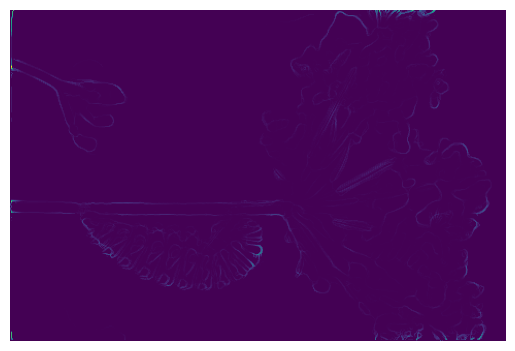

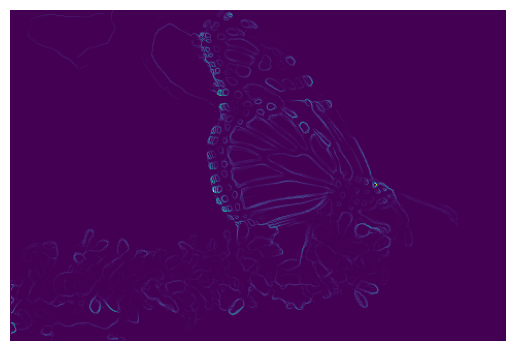

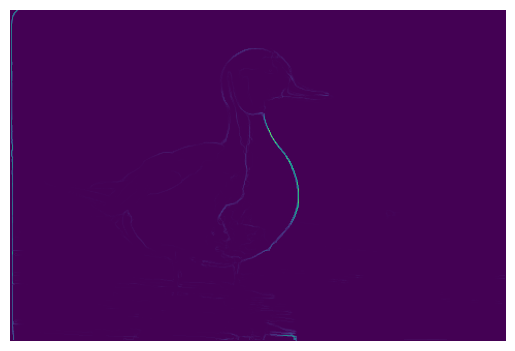

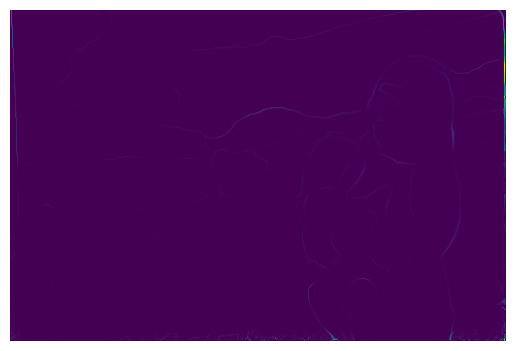

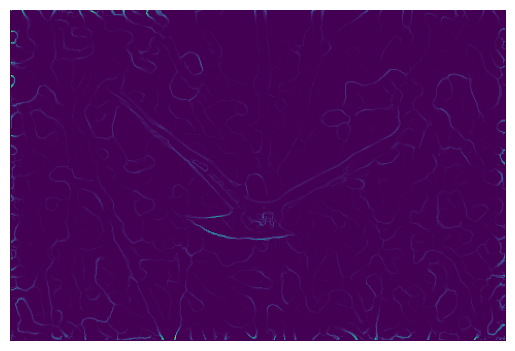

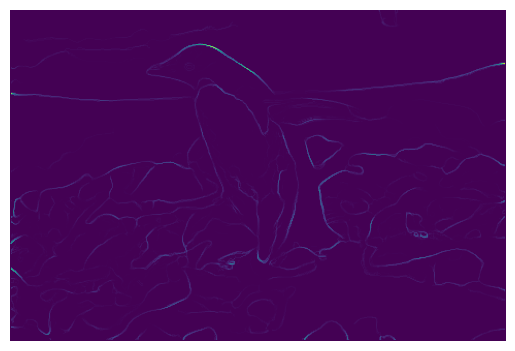

In [ ]:
texton_maps = texton
for i in range(10):

  texton_maps[i] = np.floor(texton[i] / (100/16)).astype(int)

  texton_maps[i] = 255*(texton_maps[i]-np.min(texton_maps[i]))/float((np.max(texton_maps[i])-np.min(texton_maps[i])))
  brightness_maps[i] = 255*(brightness_maps[i]-np.min(brightness_maps[i]))/float((np.max(brightness_maps[i])-np.min(brightness_maps[i])))
  color_maps[i] = 255*(color_maps[i]-np.min(color_maps[i]))/float((np.max(color_maps[i])-np.min(color_maps[i])))

for i in range(0,10):
  tg = chi_square(texton_maps[i],16,halfdisks)
  bg = chi_square(brightness_maps[i],16,halfdisks)
  cg = chi_square(color_maps[i],16, halfdisks)
  # cg = chi_square(blue_maps[i],16, halfdisks)

  sobeline = np.multiply(cv2.imread("/content/drive/MyDrive/Phase1/BSDS500/SobelBaseline/"+str(i+1)+".png",0),0.5)
  cannyline = np.multiply(cv2.imread("/content/drive/MyDrive/Phase1/BSDS500/CannyBaseline/"+str(i+1)+".png",0),0.5)
  pb = (bg+tg+cg)/3
  pb = pb*(sobeline+cannyline)
  plt.imshow(pb)#, cmap = 'gray')
  plt.axis('off')
  plt.show()


[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


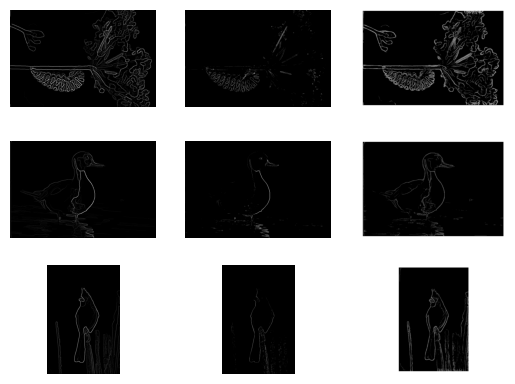

In [ ]:
image1 = cv2.imread('/content/drive/MyDrive/Phase1/pblite/2.png')

image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image1 = cv2.equalizeHist(image1)
mask = image1 == 25
image1[mask] = 255
print(image1)
image1_canny = cv2.imread('/content/drive/MyDrive/Phase1/BSDS500/CannyBaseline/2.png')
image1_canny = cv2.cvtColor(image1_canny, cv2.COLOR_BGR2GRAY)
image1_sobel = cv2.imread('/content/drive/MyDrive/Phase1/BSDS500/SobelBaseline/2.png')
image1_sobel = cv2.cvtColor(image1_sobel, cv2.COLOR_BGR2GRAY)
_, ax = plt.subplots(3, 3)
ax[0,0].imshow(image1_canny, cmap='gray')
ax[0,1].imshow(image1_sobel, cmap='gray')
ax[0,2].imshow(image1, cmap='gray')
for i in range(3):
  for j in range(3):
    ax[i,j].axis('off')
image1 = cv2.imread('/content/drive/MyDrive/Phase1/pblite/4.png')

image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image1 = cv2.equalizeHist(image1)
mask = image1 == 25
image1[mask] = 255
print(image1)
image1_canny = cv2.imread('/content/drive/MyDrive/Phase1/BSDS500/CannyBaseline/4.png')
image1_canny = cv2.cvtColor(image1_canny, cv2.COLOR_BGR2GRAY)
image1_sobel = cv2.imread('/content/drive/MyDrive/Phase1/BSDS500/SobelBaseline/4.png')
image1_sobel = cv2.cvtColor(image1_sobel, cv2.COLOR_BGR2GRAY)

ax[1,0].imshow(image1_canny, cmap='gray')
ax[1,1].imshow(image1_sobel, cmap='gray')
ax[1,2].imshow(image1, cmap='gray')

image1 = cv2.imread('/content/drive/MyDrive/Phase1/pblite/10.png')

image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image1 = cv2.equalizeHist(image1)
mask = image1 == 25
image1[mask] = 255
print(image1)
image1_canny = cv2.imread('/content/drive/MyDrive/Phase1/BSDS500/CannyBaseline/10.png')
image1_canny = cv2.cvtColor(image1_canny, cv2.COLOR_BGR2GRAY)
image1_sobel = cv2.imread('/content/drive/MyDrive/Phase1/BSDS500/SobelBaseline/10.png')
image1_sobel = cv2.cvtColor(image1_sobel, cv2.COLOR_BGR2GRAY)

ax[2,0].imshow(image1_canny, cmap='gray')
ax[2,1].imshow(image1_sobel, cmap='gray')
ax[2,2].imshow(image1, cmap='gray')



plt.show()

NameError: name 'cv2' is not defined